# Micro Genetic Algorithm Visualization on the Binh Korn Function

The idea here is to explore various parameters and settings, especially different evaluators and shuffling.

First we need to import the necessary modules.

In [1]:
import mga
import numpy as np
import matplotlib.pyplot as plt
from problems import BinhKorn
from evaluator import NonDominatedSortEvaluator
from evaluator import WeightBasedEvaluator
from mga import MicroGeneticAlgorithm, AlgorithmRunner
from visualize import plot_binh_korn_pareto_front, plot_agents

For the first run we use the simple method: A weighted sum of the different objective functions to reduce our problem to a single objective optimization problem. This we can solve multiple times with different (random) weights hoping to explore the full set of solutions. Every run of the micro genetic algorithm thus results in one point on the final front.

In [2]:
seed = 42
random_restarts = 200
problem = BinhKorn()
evaluator = WeightBasedEvaluator(problem, seed)
mga = MicroGeneticAlgorithm(
    problem,
    evaluator,
    population_size=21,
    agents_to_keep=1,
    max_iterations=50,
    num_bits=8,
    seed=seed
)
runner = AlgorithmRunner(mga, seed)
best_agents = runner.run(times=random_restarts)

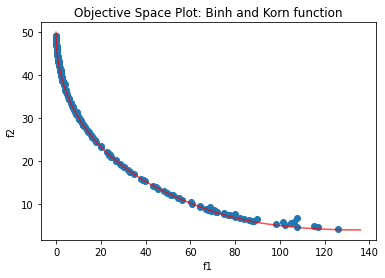

In [3]:
fig, ax = plt.subplots()
plot_agents(ax, best_agents, problem)
plot_binh_korn_pareto_front(ax)

Now let's compare the multiple runs with the weighted sum to a single run (with more individuals) of the pareto-dominance based evaluator